<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/artificial_neural_network_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemple : image classification on Fashion-MNIST dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Each example is assigned to one of the following labels:  T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.<br><br>
In this example, we build a neural network to classify images as fashion articles. 


https://www.kaggle.com/songulerdem/car-sales-forecast-with-multi-layer-perceptron

## Load Dataset
Run the cell below to load the Fashion-MNIST dataset.

In [46]:
from tensorflow.keras.datasets import fashion_mnist 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Here, we create a dictionary of the articles.

In [2]:
codes_to_articles = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

We display the shape of the training set and the test set. The train set has 60 000 images of shape (28,28). The test set has 10 000 images of shape (28,28). 

In [3]:
print("shape of train set:"+str(x_train.shape))
print("shape of test set:"+str(x_test.shape))

train_image_25 = x_train[25]
print("shape of train_image_25 :"+str(x_train[25].shape))

shape of train set:(60000, 28, 28)
shape of test set:(10000, 28, 28)
shape of train_image_25 :(28, 28)


We plot the image 25:

Text(0.5, 1.0, 'Dress')

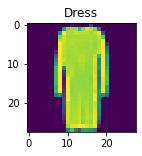

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[25])
plt.title(codes_to_articles[y_train[25]])

We plot 9 images from the training set:

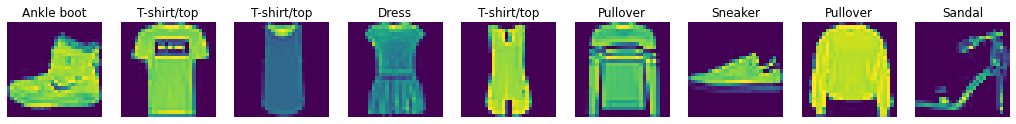

In [41]:
import matplotlib.pyplot as plt
#i = 0
plt.figure(figsize=(20,40))
for i in range(0,9):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i])
  plt.title(codes_to_articles[y_train[i]])
  plt.axis("off")

## Flatten layer
Flatten is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 28,28), then the output shape of the layer will be (batch_size,28*28). 

In [6]:
from tensorflow.keras.layers import Flatten

print("shape before: "+str(x_train[25].shape))
X_output = Flatten()(x_train[25].reshape(1,28,28))
X_output.shape

shape before: (28, 28)


TensorShape([1, 784])

## Define model
In Tensorflow.Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the sequential model.<br><br> 
In this section we build an ANN (artificial neural network) with the following layers
* an Input layer
* a Flatten layer
* a Dense layer with 128 units and activation='relu'
* a Dense layer with 10 units and acitvation='sofmax'

The last layer is a Dense one with 10 units and a softmax activation since we have 10 classes. This last layer outputs a probability vector.

In [7]:
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from tensorflow.keras.models import Sequential

model_1 = Sequential()
model_1.add(InputLayer(input_shape=(28,28)))
model_1.add(Flatten())
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(10,activation='softmax'))

We can build the same ANN without InputLayer and let the first layer to have the input_shape. Keras will add a input for the model behind the scene.

In [34]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model_2= Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(10,activation='softmax'))

Once we have defined the ANN, we have to compile it. During the compile stage, we define:
* the loss of the model
* the optimizer for the gradient descent 
* the metric

In [9]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Convert y_train and y_test to binary class matrix
tf.keras.utils.to_categorical converts a class vector (integers) to binary class matrix. 

In [14]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)
y_train_cat

## normalizing data
In the Fashion-MNIST dataset 28x28 pixels are used to modelized each image. The pixel values are in the range of 0 to 255 for each. It’s good practice to work with normalized data. We standardize the pixel values to the [0, 1] range by devising each pixel value by 255.

In [13]:
x_train_norm = x_train/255
x_test_norm = x_test/255

## Fit the model and evaluate it
We fit the model_1 with 10 epochs and validation_split=0.1.

In [16]:
model_1.fit(x_train_norm,y_train_cat,epochs=10,validation_split=0.1)

Now, we can evaluate the model on the test set:

In [17]:
model_1.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3510 - accuracy: 0.8795


[0.35103997588157654, 0.8794999718666077]

We save the model in h5 format:

In [18]:
model_1.save("./model_1.h5")

## Trying the model with a new image
First we plot the image we will pass to the model: it's a Coat. 

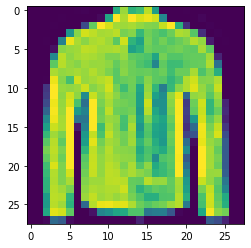

In [22]:
new_image = x_test[50]
import matplotlib.pyplot as plt
plt.imshow(new_image)

We preprocess the image : we normalize and reshape the image we will pass to the model.

In [32]:
new_image = x_test[50]/255
new_image = new_image.reshape(1,28,28)
true_label = y_test[50]

We create a probability vector with the .predict method.

In [29]:
vect_proba = model_1.predict(new_image)
vect_proba

array([[1.0660829e-04, 6.7404990e-06, 3.6417544e-02, 2.9443548e-08,
        7.9127234e-01, 5.8475950e-14, 1.7219192e-01, 1.2243681e-09,
        2.9631690e-06, 1.8088770e-06]], dtype=float32)

We display the predicted classe :

In [31]:
import numpy as np
codes_to_articles[np.argmax(vect_proba)]

'Coat'

## Build an other model
In this section we build an ANN (artificial neural network) with the following layers

* a Flatten layer
* a BatchNormalization layer
* a Dense layer with 65 units and activation='relu'
* a Dropout layer with rate 0.2
* a Dense layer with 20 units and activation='relu'
* a Dropout layer with rate 0.1 
* a Dense layer with 10 units and acitvation='sofmax'

We fit the model with 20 epochs and validation_splits=0.1.

In [43]:
from tensorflow.keras.layers import Dense,InputLayer, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Sequential

model_3 = Sequential()
model_3.add(Flatten(input_shape=(28,28)))
model_3.add(BatchNormalization())
model_3.add(Dense(100,activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20,activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(10,activation='softmax'))

model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_3.fit(x_train_norm,y_train_cat,epochs=20,validation_split=0.1)
model_3.evaluate(x_test_norm,y_test_cat)

# Exercice : digits prediction
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image.<br><br>
The goal of this exercise is to build a model able to predict the digits on an image. Run the cell below to load the data. Before doing this exercise, you should read the example.




In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[np.isin(y_train,[0,1,2,3,4,5])]
y_train = y_train[np.isin(y_train,[0,1,2,3,4,5])]
x_test = x_test[np.isin(y_test,[0,1,2,3,4,5])]
y_test = y_test[np.isin(y_test,[0,1,2,3,4,5])]

11501568/11490434 [==============================] - 0s 0us/step


1/ How many distinct classes are there in the dataset? Plot an image of each class.

In [2]:
#how many distinct classes are there in the dataset?
import numpy as np

array([0, 1, 2, 3, 4, 5], dtype=uint8)

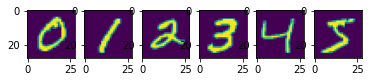

In [7]:
#Plot an image of each class
import matplotlib.pyplot as plt
for cla in np.unique(y_train):
  plt.subplot(1,6,cla+1)
  x_sel = x_train[y_train==cla][0]
  plt.imshow(x_sel)

2/ What is the shape of x_train? What is the batch size of x_train? What is the shape of x_train[5]? What is the digit of x_train[5]? Plot x_train[5].

3/ Standardize the images of the training and test set. Store the result in x_train stand and x_test stand. We standardize the pixel values to the [0, 1] range by devising each pixel value by 255.

In [14]:
x_train_stand = 
x_test_stand = 

4/ Convert y_train and y_test to binary class matrix.
use tf.keras.utils.to_categorical with num_classes = 6. Store the results into y_train_class and y_test_class.

In [16]:
from tensorflow.keras.utils import to_categorical
y_train_class = 
y_test_class = 

5/ Build an ANN (artificial neural network) called ANN_1 with the following layers
* a Flatten layer with input_shape=(28,28)
* a Dense layer with 60 units and activation='relu'
* a Dense layer with 20 units and activation='relu'
* the last Dense layer. The number of units is equal to the number of classes. The activation function should be properly chosen.

In [20]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

ANN_1 = Sequential()

Compile ANN with: a SGD optimizer, a categorical_crossentropy loss, and metrics=['accuracy'].

6/ Fit ANN_1 with epochs=15 and validation_split=0.07. For this purpose you have to use x_train_stand,y_train_class. 

Evaluate ANN_1 over the test set.

7/ Now, we use your ANN_1 model to predict the class of the following image:

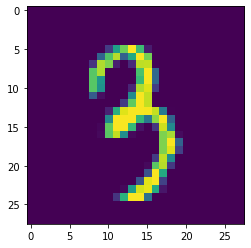

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1998])

In [29]:
image_to_predict = x_train[1998]/255
image_to_predict = image_to_predict.reshape(1,28,28)

Pass image_to_predict to your model and display the predicted class.

In [47]:
import numpy as np


8/ 
In this question we build an other ANN with the following layers

* a Flatten layer
* a BatchNormalization layer
* a Dense layer with 70 units and activation='relu'
* a Dropout layer with rate = 0.2
* a Dense layer with 50 units and activation='relu'
* a Dropout layer with rate 0.1 
* a Dense layer with 15 units and activation='relu'
* a dropout layer with rate 0.1
* a Dense layer with 6 units and acitvation='sofmax'

Compile this model with: an adam optimizer, a categorical_crossentropy loss, and metrics=['accuracy']. Don't fit this model.

In [44]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# RGB images in numpy


So far we dealt with grayscale images. Most of the time, we deal with RGB images. In this section, we explain how an RGB image is modeled in numpy.

In [40]:
import requests, io
import numpy as np
import matplotlib.pyplot as plt
import h5py
#Remove "blob",  Replace github.com by raw.githubusercontent.com
url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/test_catvnoncat.h5"
r = requests.get(url)
hf = h5py.File(io.BytesIO(r.content),'r')
test_set_x_orig = np.array(hf["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(hf["test_set_y"][:])

We display a picture. The shape of each picture is (64,64,3).

the shape of each picture is: (64, 64, 3)


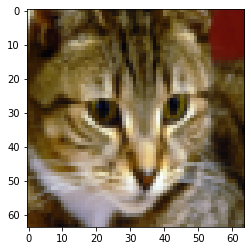

In [42]:
index = 15
plt.imshow(test_set_x_orig[index])

print("the shape of each picture is: "+ str(test_set_x_orig[index].shape))

Actually, in this example, a picture is a NumPy object with 3 channels. Each channel is a Numpy object. In other words, a picture is a stack of the 3 channels. We display the 3 channels. We notice each channel is a picture.  

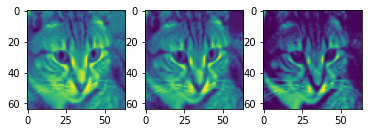

In [41]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(test_set_x_orig[index][:,:,0])
axarr[1].imshow(test_set_x_orig[index][:,:,1])
axarr[2].imshow(test_set_x_orig[index][:,:,2])